# 20176007 NAM YUNWOO

In [1]:
import numpy as np
from random import shuffle, choice
import random
import matplotlib.pyplot as plt
from scipy import random as scRandom
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D

# problem 1

In [2]:
n = 100000
doors = ['car', 'goat', 'goat']
stayWin = 0
switchWin = 0
print("Start simulation ...")
for i in range(n):
    shuffle(doors)
    myChoice = choice([0, 1, 2])
    stay_switch = {"stay":myChoice,"switch":-1}
    montyOpen_candi = []
    for i in range(3):
        if i != myChoice and doors[i] == "goat":
            montyOpen_candi.append(i)
    montyOpen = choice(montyOpen_candi)
    for i in range(3):
        if i != myChoice and i != montyOpen:
            stay_switch["switch"] = i
            break
    if doors[stay_switch["stay"]] == "car":
        stayWin += 1
    else:
        switchWin +=1 
print("""
Winning rate
Staying: %.4f%%
Switching: %.4f%%"""%(stayWin/n*100,switchWin/n*100))

Start simulation ...

Winning rate
Staying: 33.1950%
Switching: 66.8050%


# problem 2

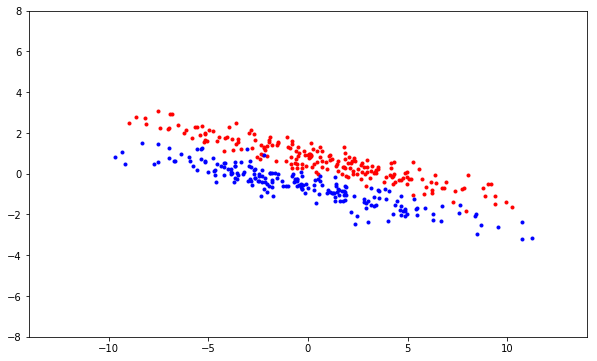

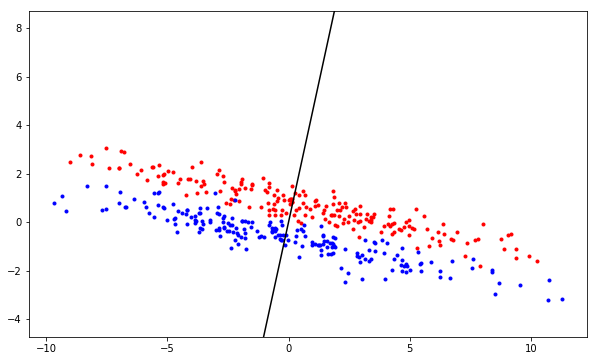

In [3]:
n0 = 200
n1 = 200

sigma = [[19, -4],
         [-4, 1]]

x0 = np.random.multivariate_normal([0.7,0.7], sigma, n0)        # data in class 0
x1 = np.random.multivariate_normal([-0.5,-0.5], sigma, n1)      # data in class 0

x0 = np.asmatrix(x0)
x1 = np.asmatrix(x1)

plt.figure(figsize = (10, 6))
plt.plot(x0[:,0],x0[:,1],'r.')
plt.plot(x1[:,0],x1[:,1],'b.')
plt.ylim([-8, 8])
plt.xlim([-14, 14])
plt.show()

mu0 = np.mean(x0.T, axis=1)
mu1 = np.mean(x1.T, axis=1)

s0 = np.cov(x0.T)
s1 = np.cov(x1.T)

w = np.asmatrix(n0*s0 + n1*s1).I * (mu0-mu1)

plt.figure(figsize = (10, 6))
plt.plot(x0[:,0],x0[:,1],'r.')
plt.plot(x1[:,0],x1[:,1],'b.')
xp = np.arange(-4, 6, 0.1)
yp = w[1,0]/w[0,0] * xp
plt.plot(xp, yp, 'k')
plt.axis('equal')
plt.ylim([-2, 6])
plt.show()

# problem 3

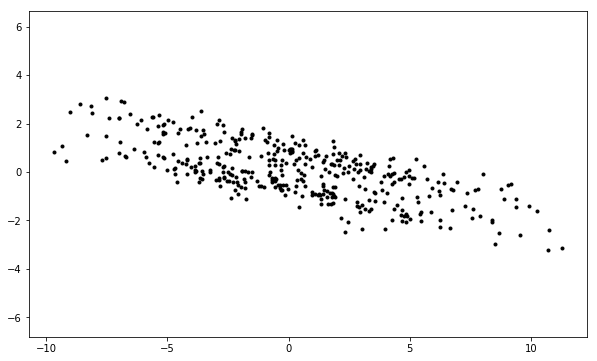

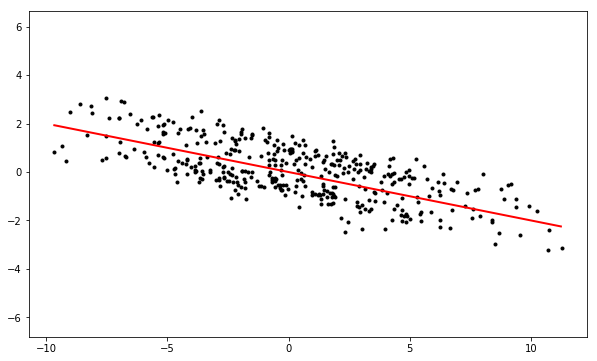

In [4]:
X = np.vstack([x0,x1])
m = X.shape[0]
plt.figure(figsize = (10, 6))
plt.plot(X[:,0],X[:,1],"k.")
plt.axis("equal")
plt.show()

S = np.asmatrix(np.cov(X.T))
D,V = np.linalg.eig(S)
idx = np.argsort(-D)
D = D[idx]
V = V[:,idx]

h = V[1,0]/V[0,0]
xp = np.arange(X[:,0].min(), X[:,0].max(), 0.1)
yp = h*xp
fig = plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'k.')
plt.plot(xp, yp, 'r', linewidth=2.0)
plt.axis('equal')
plt.show()

# problem 4

(1000, 5)
[[-0.90044497 -0.67530495 -1.18187824 -0.84864952 -1.04650299]
 [ 1.25279698  0.56862115 -1.05791317 -0.8154806  -0.6186437 ]
 [-0.70236284 -1.31844542 -0.87253091 -1.70041116 -0.84862194]
 ..., 
 [-0.20112571  0.48769209 -2.51444673 -0.69828616 -1.38509513]
 [-1.80820156 -2.39733489 -1.89580342 -2.24573166 -1.4158733 ]
 [ 0.21272409  0.69282536  0.44367092  0.65381598 -0.08136573]]


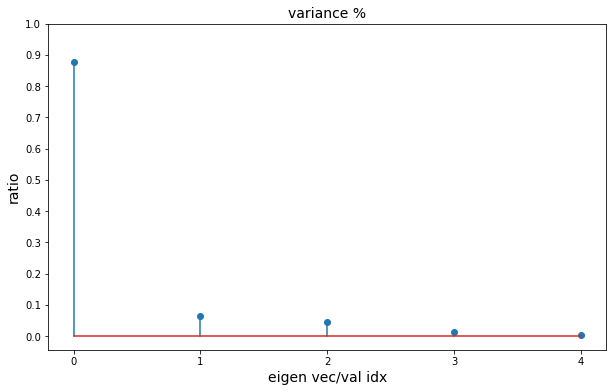

In [5]:
A = scRandom.rand(5,5)
A = np.asmatrix(A)
sigma = A.T*A
X = np.random.multivariate_normal([0.,0.,0.,0.,0.],sigma, 1000)
print(X.shape)
print(X)

S = np.asmatrix(np.cov(X.T))

D,V = np.linalg.eig(S)

idx = np.argsort(-D)

D = D[idx]

V = V[:,idx]
plt.figure(figsize=(10,6))
plt.stem(D/D.sum())
plt.xticks(range(0,5))
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel("eigen vec/val idx",fontsize= 14)
plt.ylabel("ratio",fontsize= 14)
plt.title("variance %",fontsize= 14)
plt.show()

## 3 principal component

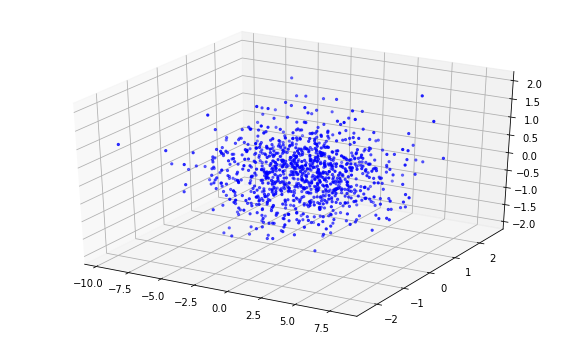

In [6]:
X_principal_3dim = X*V[:,:3]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
x = X_principal_3dim[:,0].reshape(-1,).tolist()[0]
y = X_principal_3dim[:,1].reshape(-1,).tolist()[0]
z = X_principal_3dim[:,2].reshape(-1,).tolist()[0]
ax.scatter(x, y, z, c="b", marker=".")
plt.show()

## 2 principal component

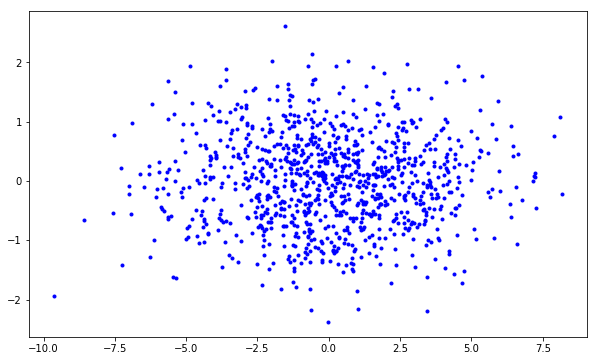

In [7]:
X_principal_2dim = X*V[:,:2]
fig = plt.figure(figsize=(10,6))

x = X_principal_2dim[:,0].reshape(-1,).tolist()[0]
y = X_principal_2dim[:,1].reshape(-1,).tolist()[0]
plt.scatter(x,y,c="b",marker=".")

plt.show()

## 1 principal component

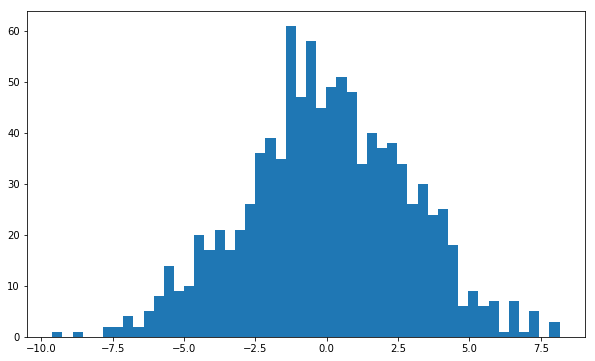

In [8]:
X_principal_1dim = X*V[:,0]
fig = plt.figure(figsize=(10,6))

x = X_principal_1dim[:,0].reshape(-1,).tolist()[0]
plt.hist(x,bins=50)
plt.show()